In [1]:
import torch.nn as nn
import torch
from torchvision import models
from datasets.linemod.dataset import DepthDataset
import torch
import os
import torch.nn.functional as F
from lib.loss_depth import L2Loss, GradientLoss, NormalLoss, BerHu
from torch import optim
import numpy as np
import time
import matplotlib.pyplot as plt
from lib.utils import setup_logger, im_convert, depth_to_img
from lib.network import DepthV3
from lib.utils import visualize
import lib.evaluate as evaluate


%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore") 

In [2]:
dataset_root = "./datasets/linemod/Linemod_preprocessed"
log_dir = 'experiments/logs/depth_prediction'
outf = 'trained_models/depth_prediction'

In [3]:
eval_dataset = DepthDataset('eval', dataset_root)
dataloader = torch.utils.data.DataLoader(eval_dataset, 
                                             batch_size=1, 
                                             shuffle=True, 
                                             num_workers=1)

Object 2 buffer loaded
Object 4 buffer loaded
Object 5 buffer loaded
Object 10 buffer loaded
Object 11 buffer loaded


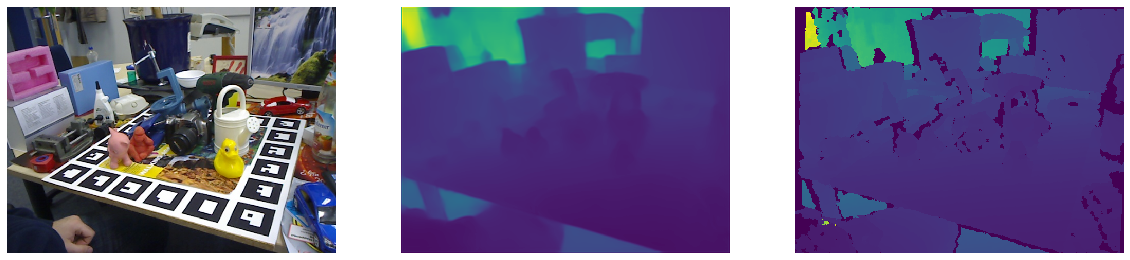

In [4]:
plot_depth():
t = next(iter(dataloader))
img, depth = t
img, depth = img[0].float().cuda().unsqueeze(0), depth[0].float().cuda().unsqueeze(0)

if version == 3:
    model = 'trained_models/depth_prediction/depthv3_71.07109753379609.pth'
    estimator = estimator = DepthV3((480, 640))
elif version == 2:
    model = 'trained_models/depth_prediction/depthv2_0.0002779090425557933.pth'
    estimator = estimator = DepthV2((480, 640))
else:
    model = 'trained_models/depth_prediction/depthv1_0.0005158761957811202.pth'
    estimator = estimator = DepthV1((480, 640))
    
estimator.load_state_dict(torch.load(model))
estimator.cuda()
estimator.eval()

pred_depth = estimator(img).cpu().detach().view(480, 640)
depth = depth.cpu().view(480, 640)

visualize(img, depth, pred_depth)

In [5]:
def eval_models(version, dataloader):
    if version == 3:
        model = 'trained_models/depth_prediction/depthv3_71.07109753379609.pth'
        estimator = DepthV3((480, 640))
    estimator.load_state_dict(torch.load(model))
    estimator.cuda()
    estimator.eval()
    evaluate.run_eval(estimator, dataloader)
    

In [6]:
eval_models(version, dataloader)

{'MSE': 20441.836366523818, 'RMSE': 142.97495013646207, 'ABS_REL': 0.06398816366942184, 'LG10': 0.026938834137201887, 'MAE': 68.51553656198446, 'DELTA1': 0.9661553172231878, 'DELTA2': 0.9933798971685391, 'DELTA3': 0.9980529006245067}
